<a href="https://colab.research.google.com/github/fellypesb/pythonForDS/blob/main/Projeto_CEAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Análise de Gastos dos Deputados** 💸 </center>

<center><img src="https://s2.glbimg.com/LVYaltJhbHyb0Y-YYKqDzcEDl_A=/0x0:1470x912/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2017/O/y/dQu5A7SymuBaPLAx7nRg/plenario-camara.jpg" height=300></center>


A política brasileira é marcada por escândulos de corrupção e mal uso do dinheiro público. Dessa forma, cabe a nós, cidadões, o acompanhamento e fiscalização dos gastos de nossos candidatos.

Deputados federais gozam da Cota para Exercício de Atividade Parlamentar - CEAP, e com isso, diversos gastos relacionados ao seu mandato podem ser custeados ou reembolsados, além da sua remuneração, auxílio moradia (quando aplicável) e a verba de gabinete. Para serem reembolsados, basta que, em até 3 (três) meses, sejam apresentados os documentos comprobatórios.

Será que o seu candidato está utilizando com responsabilidade e repeito o dinheiro público? Essas e outras informações podem ser obtidas facilmente atráves de dados abertos disponibilizados na internet. Nesse sentido, este projeto visa realizar  uma análise exploratória sobre os gastos de deputados federais durante o ano de 2020 por meio do CEAP.

Limpe a lente de seus óculos, pegue um café e vamos juntos verificar como está sendo utilizado o dinheiro provindo de nossos impostos. 🔍


**Fonte dos Dados:** https://brasil.io

**Informações sobre os dados:** [Dicionário](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml)

**Tipo de arquivo**: csv

**Período**: 2020



# **Importação dos dados 📂**

In [ ]:
import pandas as pd

url = 'https://github.com/fellypesb/pythonForDS/blob/main/Datasets/gastos-deputados-ace1e36c152246dea3c3d64a610579be.csv?raw=true'
gastosCEAP = pd.read_csv(url)

# Exibe as primeiras linhas do DataFrame 
gastosCEAP.head() 

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
0,2020,1,NaN,Norma Ayub,DEM,ES,TELEFONIA,00000000000006,RAMAL,0.30,0.0,0.30
1,2020,1,NaN,Fausto Pinato,PP,SP,TELEFONIA,00000000000006,RAMAL,2.36,0.0,2.36
2,2020,1,NaN,Iracema Portella,PP,PI,TELEFONIA,00000000000006,RAMAL,22.11,0.0,22.11
3,2020,1,NaN,Fábio Henrique,PDT,SE,TELEFONIA,00000000000006,RAMAL,26.39,0.0,26.39
4,2020,1,NaN,Bacelar,PODE,BA,TELEFONIA,00000000000006,RAMAL,10.68,0.0,10.68


Para garantir a legibilidade e entendimento das informações coletadas, vamos alterar a nomenclatura das colunas com o seguinte padrão:
- Texto em *uppercase*;
- Separação de palavras com o caracter underscore (snake case).

In [ ]:
# Renomeação das colunas
gastosCEAP.columns = ['ano', 'mes', 'data_emissao', 'parlamentar', 'partido', 'uf', 'descricao', 'cnpj/cpf_fornecedor',
                      'fornecedor', 'valor_documento', 'valor_glosa', 'valor_liquido']

# **Conhecendo a base de dados 🧐**



In [ ]:
# Verifica a quantidade de linhas e colunas do Data Frame
gastosCEAP.shape

(21874, 12)

In [ ]:
# Obtem informações sobre o tipo dos dados que foram importados 
gastosCEAP.dtypes

ano                      int64
mes                      int64
data_emissao            object
parlamentar             object
partido                 object
uf                      object
descricao               object
cnpj/cpf_fornecedor     object
fornecedor              object
valor_documento        float64
valor_glosa            float64
valor_liquido          float64
dtype: object

In [ ]:
# Exibe os elementos unicos presentes no atributo mes
gastosCEAP['mes'].unique()

array([1, 3, 2])

In [ ]:
# Exibe 5 (cinco) amostra aleatórias do Data Frame
gastosCEAP.sample(5)

,ano,mes,data_emissao,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
9665,2020,1,2020-02-05 00:00:00+00:00,Lídice da Mata,PSB,BA,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,13927801000491,SECRETARIA MUNICIPAL DA FAZENDA SALVADOR,134.4,0.88,133.52
11697,2020,2,2020-02-01 00:00:00+00:00,Reinhold Stephanes Junior,PSD,PR,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,04151097000194,CENTRAL SERVER INFORMATICA LTDA,74.9,0.00,74.90
8609,2020,2,2020-02-06 00:00:00+00:00,Sérgio Brito,PSD,BA,COMBUSTÍVEIS E LUBRIFICANTES.,20467448000127,POSTO APACHE,100.0,0.00,100.00
7870,2020,2,2020-02-09 00:00:00+00:00,Dr. Leonardo,SOLIDARIEDADE,MT,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",02472487000130,HOTEL PORTO BELLO LTDA,110.0,0.00,110.00
10840,2020,2,2020-02-03 00:00:00+00:00,Marina Santos,SOLIDARIEDADE,PI,COMBUSTÍVEIS E LUBRIFICANTES.,05454390000193,GOES COMBUSTIVEIS LUBRIRICANTES E GLP LTDA,150.0,0.00,150.00


In [ ]:
# Exibe as 5 (cinco) últimas linhas do Data Frame
gastosCEAP.tail()

,ano,mes,data_emissao,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
21869,2020,2,2019-12-03 00:00:00+00:00,João Marcelo Souza,MDB,MA,COMBUSTÍVEIS E LUBRIFICANTES.,08884038000186,FRATELLI POSTO DE COMBUSTIVEIS LTDA,150.00,0.00,150.00
21870,2020,1,2019-12-02 00:00:00+00:00,Igor Kannário,DEM,BA,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,13281747000107,CONDOMINIO MUNDO PLAZA,697.10,63.37,633.73
21871,2020,1,2019-12-02 00:00:00+00:00,Otto Alencar Filho,PSD,BA,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,13281747000107,CONDOMINIO MUNDO PLAZA,723.65,139.87,583.78
21872,2020,1,2019-12-02 00:00:00+00:00,Otto Alencar Filho,PSD,BA,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,13281747000107,CONDOMINIO MUNDO PLAZA,723.65,139.87,583.78
21873,2020,1,2019-11-25 00:00:00+00:00,Marcos Aurélio Sampaio,MDB,PI,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,09192288000118,MAZUAD AUTOLOCADORA,12000.00,0.00,12000.00


Ao executar os comandos anteriores foi possível identificar que a base de dados é composta por uma grande quantidade de registros (21874), divididos entre dados do tipo categórico (string) e numérico (int, float) contendo registros referentes ao mês de Janeiro, Fevereiro e Março.

# **Tratamento da base de dados 🔨**


### **Conversão de tipos**
Ao verificar o tipo dos dados que foram importados, identificou-se que o atributo `data_emissao` foi classificado como atributo categórico e não do tipo data. Neste caso, é necessário realizar uma conversão de tipos para que possamos manipular essas informações da melhor forma possível. 

In [ ]:
# Realiza uma conversão de tipo de dados
gastosCEAP['data_emissao'] = pd.to_datetime(gastosCEAP['data_emissao'])
gastosCEAP.dtypes

ano                                  int64
mes                                  int64
data_emissao           datetime64[ns, UTC]
parlamentar                         object
partido                             object
uf                                  object
descricao                           object
cnpj/cpf_fornecedor                 object
fornecedor                          object
valor_documento                    float64
valor_glosa                        float64
valor_liquido                      float64
dtype: object

### **Tratamento de valores faltantes**
Alguns valores do tipo **NaN** podem estar presentes na base de dados, resultantes principalmente da ausência de valor em um determinado registro. Para o computador os **NaN** são valores não numéricos indefinidos ou irrepresentáveis e por isso precisam ser tratados.

In [ ]:
# Verifica a presença de dados faltantes
gastosCEAP.isna().sum()

ano                      0
mes                      0
data_emissao           509
parlamentar              0
partido                  0
uf                      82
descricao                0
cnpj/cpf_fornecedor      0
fornecedor               0
valor_documento          0
valor_glosa              0
valor_liquido            0
dtype: int64

In [ ]:
# Verifica a proporção dos dados faltantes
(gastosCEAP.isna().sum().sum()/gastosCEAP.shape[0])*100

2.701837798299351

Foram identificados 591 valores faltantes na base de dados, 509 no atributo `data_emissao` e 82 no atributo `uf`. Ao todo eles correspondem cerca de 2,7% da base de dados.

In [ ]:
gastosCEAP[gastosCEAP['data_emissao'].isnull()]

,ano,mes,data_emissao,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
0,2020,1,NaT,Norma Ayub,DEM,ES,TELEFONIA,00000000000006,RAMAL,0.30,0.0,0.30
1,2020,1,NaT,Fausto Pinato,PP,SP,TELEFONIA,00000000000006,RAMAL,2.36,0.0,2.36
2,2020,1,NaT,Iracema Portella,PP,PI,TELEFONIA,00000000000006,RAMAL,22.11,0.0,22.11
3,2020,1,NaT,Fábio Henrique,PDT,SE,TELEFONIA,00000000000006,RAMAL,26.39,0.0,26.39
4,2020,1,NaT,Bacelar,PODE,BA,TELEFONIA,00000000000006,RAMAL,10.68,0.0,10.68
...,...,...,...,...,...,...,...,...,...,...,...,...
504,2020,1,NaT,Joseildo Ramos,PT,BA,TELEFONIA,00000000000006,RAMAL,1.80,0.0,1.80
505,2020,1,NaT,Fabiano Tolentino,CIDADANIA,MG,TELEFONIA,00000000000006,RAMAL,6.31,0.0,6.31
506,2020,1,NaT,Fernando Borja,AVANTE,MG,TELEFONIA,00000000000006,RAMAL,4.06,0.0,4.06
507,2020,1,NaT,Dr. Gonçalo,REPUBLICANOS,MA,TELEFONIA,00000000000006,RAMAL,30.41,0.0,30.41


Ao exibir a localização dos valores faltantes do atributo `data_emissao` (célula acima), verificou-se que as demais informações das mesmas linhas estavam completas e que por isso uma exclusão por linhas não seria interessante. Considerou-se então, realizar a exclusão da coluna inteira, pois este atributo é referente a data de emissão do documento fiscal, informação sem muita relevência para este estudo.

In [ ]:
# Exclui a coluna data_emissao da base de dados
gastosCEAP.drop(['data_emissao'], axis=1, inplace=True)
gastosCEAP.head(5)

,ano,mes,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
0,2020,1,Norma Ayub,DEM,ES,TELEFONIA,00000000000006,RAMAL,0.30,0.0,0.30
1,2020,1,Fausto Pinato,PP,SP,TELEFONIA,00000000000006,RAMAL,2.36,0.0,2.36
2,2020,1,Iracema Portella,PP,PI,TELEFONIA,00000000000006,RAMAL,22.11,0.0,22.11
3,2020,1,Fábio Henrique,PDT,SE,TELEFONIA,00000000000006,RAMAL,26.39,0.0,26.39
4,2020,1,Bacelar,PODE,BA,TELEFONIA,00000000000006,RAMAL,10.68,0.0,10.68


In [ ]:
# Exibe apenas as linhas que contem Nan na coluna uf
gastosCEAP[gastosCEAP['uf'].isnull()]

,ano,mes,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
1002,2020,3,LIDERANÇA DO PT,PT,NaN,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,15146943000102,AP SELF MEDIA COMUNICAÇÃO LTDA EPP,1011.56,0.0,1011.56
1144,2020,3,LIDERANÇA DO PT,PT,NaN,COMBUSTÍVEIS E LUBRIFICANTES.,30642701000195,AUTO POSTO 302 SUL LTDA,100.00,0.0,100.00
1145,2020,3,LIDERANÇA DO PT,PT,NaN,COMBUSTÍVEIS E LUBRIFICANTES.,00306597005166,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,167.65,0.0,167.65
1146,2020,3,PSD,PSD,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,08906504000187,COSTA e ALMEIDA ORGANIZACAO DE EVENTOS LTDA - ME,900.00,0.0,900.00
1421,2020,3,LIDERANÇA DO PT,PT,NaN,COMBUSTÍVEIS E LUBRIFICANTES.,08884038000186,FRATELLI POSTO DE COMBUSTIVEIS LTDA,224.02,0.0,224.02
...,...,...,...,...,...,...,...,...,...,...,...
20934,2020,1,SDD,SDD,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,02999520000185,Adobe Systems Software,124.00,0.0,124.00
21076,2020,1,NOVO,NOVO,NaN,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,14998747000195,TKTL INFORMATICA LTDA,278.80,0.0,278.80
21353,2020,1,PODE,PODE,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,05322090000150,MAP COMERCIO,734.20,0.0,734.20
21641,2020,1,LIDERANÇA DO PT,PT,NaN,PASSAGENS AÉREAS,07575651000159,GOL LINHAS AEREAS S.A.,1307.60,0.0,1307.60


Ao exibir a localização dos valores faltantes no atributo `uf`, algo estranho é encontrado. Nessas linhas, o nome do parlamentar não é identificado, é possível encontrar apenas uma referência genérica ao partido ao qual o parlamentar pertence, uma forma semelhante de anonimato. Sem o nome do parlamentar torna-se impossível a identificação da unidade de federação pela qual o deputado foi eleito. Por isso, optou-se pela técnica de exclusão de todas as linhas que apresentassem valores faltantes neste atributo.

In [ ]:
# Reliza a exclusão de Nan por linhas
gastosCEAP.dropna(inplace=True)
gastosCEAP.isna().sum()

ano                    0
mes                    0
parlamentar            0
partido                0
uf                     0
descricao              0
cnpj/cpf_fornecedor    0
fornecedor             0
valor_documento        0
valor_glosa            0
valor_liquido          0
dtype: int64

Como este projeto análisa apenas dados referentes ao ano de 2020 o atributo `ano` não nos apresenta utilidade, pois em todas as linhas será encontrado o mesmo ano. Também iremos excluir este atributo.

In [ ]:
# Realiza a exclusão do atributo ano
gastosCEAP.drop('ano', axis=1, inplace=True)
gastosCEAP.head()

,mes,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
0,1,Norma Ayub,DEM,ES,TELEFONIA,00000000000006,RAMAL,0.30,0.0,0.30
1,1,Fausto Pinato,PP,SP,TELEFONIA,00000000000006,RAMAL,2.36,0.0,2.36
2,1,Iracema Portella,PP,PI,TELEFONIA,00000000000006,RAMAL,22.11,0.0,22.11
3,1,Fábio Henrique,PDT,SE,TELEFONIA,00000000000006,RAMAL,26.39,0.0,26.39
4,1,Bacelar,PODE,BA,TELEFONIA,00000000000006,RAMAL,10.68,0.0,10.68


In [ ]:
gastosCEAP.query('valor_documento < 0 or valor_glosa < 0 or valor_liquido < 0')

,mes,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
15662,1,Daniel Almeida,PCdoB,BA,Emissão Bilhete Aéreo,00512777000135,Cia Aérea - PASSAREDO,-31.08,0.0,-31.08
15663,1,Daniel Almeida,PCdoB,BA,Emissão Bilhete Aéreo,00512777000135,Cia Aérea - PASSAREDO,-31.27,0.0,-31.27
20242,1,Rodrigo de Castro,PSDB,MG,Emissão Bilhete Aéreo,02012862000160,Cia Aérea - TAM,-598.59,0.0,-598.59


Também foram encontrados valores negativos nos atributos `valor_documento` e `valor_liquido`. Após ler o dicionário de informações, entendeu-se que esses valores significam que o referido bilhete é um bilhete de compensação, pois compensa um outro bilhete emitido e não utilizado pelo deputado.

# **Verificando Estatísticas Descritivas 📈**

In [ ]:
# Buscando o maior valor dos atributos
gastosCEAP[['valor_documento','valor_glosa','valor_liquido']].max()

valor_documento    53000.0
valor_glosa        11287.0
valor_liquido      53000.0
dtype: float64

In [ ]:
# Buscando o menor valor dos atributos 
gastosCEAP[['valor_documento','valor_glosa','valor_liquido']].min()

valor_documento   -598.59
valor_glosa          0.00
valor_liquido     -598.59
dtype: float64

In [ ]:
# Calculando a média dos atributos
gastosCEAP[['valor_documento','valor_glosa','valor_liquido']].mean()

valor_documento    808.022522
valor_glosa          3.857018
valor_liquido      803.849465
dtype: float64

In [ ]:
# Calculando a mediana dos atributos
gastosCEAP[['valor_documento','valor_glosa','valor_liquido']].median()

valor_documento    165.000
valor_glosa          0.000
valor_liquido      162.985
dtype: float64

In [ ]:
# Calculando o desvio padrão dos atributos
gastosCEAP[['valor_documento','valor_glosa','valor_liquido']].std()

valor_documento    2263.604559
valor_glosa         101.532955
valor_liquido      2259.704609
dtype: float64

Foi possível abservar que os atributos `valor_documento` e `valor_liquido` são quase idênticos com exceção de alguns poucos descontos ocorridos. Por isso esses atributos apresentam média, mediana e desvio padrão muito próximos. O alto valor do desvio padrão para os atributos `valor_documento` e `valor_liquido` indica que essas séries estão bastante dispersas, isto é, possuem valores distante de suas médias.

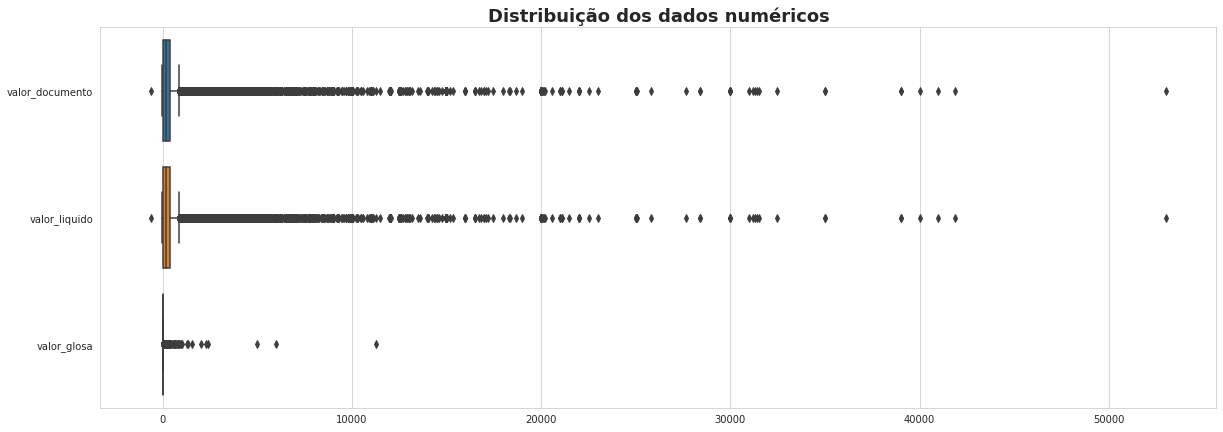

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Realiza a plotagem de um bloxplot para os atributos fornecidos
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(20,7))
    sns.boxplot(data=gastosCEAP[['valor_documento','valor_liquido', 'valor_glosa']], orient='h')
    ax.set_title('Distribuição dos dados numéricos', fontdict={'fontsize':18, 'fontweight': 'bold'})
    plt.show()

Com o boxplot anterior e possível, novamente, constatar que os atributos `valor_documento` e `valor_liquido` apresentam a mesma distribuição com variações entre -598 a 53000. Já o atributo `valor_glosa` apresenta uma distribuição cerca de 5 vezes menor com alguns poucos valores extremos e mediana centrada no valor 0.

# **Extraindo insights** 💡

Agora que já conhecemos um pouco mais a base de dados, podemos responder algumas pergutas interessantes que podem ser feitas sobre essas informações.

### **1 - Qual o parlamentar que teve o maior reembolso com a cota CEAP no ano de 2020 e qual partido ele pertence?**

In [ ]:
# Realiza o agrupapamento por parlamentar e depois realiza um somatório dos atributos
parlamentar = gastosCEAP.groupby('parlamentar')['valor_liquido'].sum().idxmax()
gastosCEAP.groupby('parlamentar').sum().loc[parlamentar]

mes                    35.00
valor_documento    107324.93
valor_glosa             0.00
valor_liquido      107324.93
Name: Flaviano Melo, dtype: float64

In [ ]:
# Exibe informações referentes apenas ao parlamentar expecificado
gastosCEAP[gastosCEAP['parlamentar'] == parlamentar]

,mes,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
112,1,Flaviano Melo,MDB,AC,TELEFONIA,00000000000006,RAMAL,2.09,0.0,2.09
568,3,Flaviano Melo,MDB,AC,SERVIÇOS POSTAIS,00000000000007,CORREIOS - SEDEX CONVENCIONAL,71.91,0.0,71.91
755,3,Flaviano Melo,MDB,AC,SERVIÇOS POSTAIS,00000000000007,CORREIOS - SEDEX CONVENCIONAL,162.86,0.0,162.86
1064,2,Flaviano Melo,MDB,AC,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,30833546000194,ENARDE FERNANDES DE OLIVEIRA,3500.00,0.0,3500.00
1659,2,Flaviano Melo,MDB,AC,LOCAÇÃO OU FRETAMENTO DE AERONAVES,05011693000131,ORTIZ TÁXI AÉREO LTDA,12000.00,0.0,12000.00
1840,2,Flaviano Melo,MDB,AC,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,29955009000138,ALDENOR DA S. E SILVA,2000.00,0.0,2000.00
2077,2,Flaviano Melo,MDB,AC,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,11464205000144,R.S.FERREIRA RIBEIRO - ME,11000.00,0.0,11000.00
3534,2,Flaviano Melo,MDB,AC,TELEFONIA,02558157002378,TELEFÔNICA BRASIL S.A.,344.60,0.0,344.60
6700,2,Flaviano Melo,MDB,AC,SERVIÇOS POSTAIS,00000000000007,CORREIOS - SEDEX CONVENCIONAL,63.32,0.0,63.32
6704,2,Flaviano Melo,MDB,AC,SERVIÇOS POSTAIS,00000000000007,CORREIOS - SEDEX CONVENCIONAL,53.19,0.0,53.19


**R=** O deputado que teve o maior reembolso com a cota CEAP em 2020 foi parlamentar **Flaviano Melo** do **MDB** que teve R\$ 107.324,93 reembolsados apenas durante os meses de Janeiro, Fevereiro e Março. O que mais chamou atenção nos seus gastos foi a divulgação da atividade parlamentar e o fretamento de aeronáveis, ambos com gastos acima de R$ 10.000,00
<img src=https://noticiasdahora.com.br/images/2021/01/26/FLAVIANO_01_large%20(1).jpg height=300>

### **2- Qual o partido que mais gastou com a cota CEAP?**

In [ ]:
# Realiza o agrupamento por partidos e realiza o somatório de seus gastos
gastosByPartidos = gastosCEAP.groupby('partido')['valor_liquido'].sum().sort_values().reset_index()
gastosByPartidos

,partido,valor_liquido
0,REDE,32917.64
1,NOVO,59450.44
2,PV,115852.31
3,CIDADANIA,153558.21
4,PATRIOTA,188585.42
5,AVANTE,207669.31
6,PSC,250686.08
7,PSOL,311827.68
8,PCdoB,386863.09
9,PTB,390152.01


**R=** De acordo com a lista acima, o partido que mais teve gastos com a cota CEAP durante o ano de 2020 foi o **PT** com R\$ 2.019.231,02

In [ ]:
# Realiza um filtro por partido em seguida um agrupamento por parlamentares, somatório dos gastos, e por fim, 
# uma ordenação dos valores em ordem decrescente para identificação dos maiores gastos
gastosCEAP.query("partido == 'PT'").groupby('parlamentar')['valor_liquido'].sum().sort_values()

parlamentar
Paulo Pimenta                2905.90
Patrus Ananias               9951.65
Airton Faleiro              10436.19
Zeca Dirceu                 12266.82
Vicentinho                  18207.24
Odair Cunha                 18395.64
Helder Salomão              18444.29
Arlindo Chinaglia           18825.34
Maria do Rosário            18898.28
Padre João                  19812.23
Luizianne Lins              20416.72
Pedro Uczai                 22024.93
Waldenor Pereira            25346.24
Rejane Dias                 25438.21
Henrique Fontana            25770.96
Valmir Assunção             26517.20
Frei Anastacio Ribeiro      28528.89
Bohn Gass                   29841.93
Margarida Salomão           30674.54
Alencar Santana Braga       31834.69
Marcon                      32559.94
Paulo Guedes                32780.94
Rui Falcão                  33092.54
Carlos Zarattini            34119.43
Benedita da Silva           34740.41
Zé Carlos                   35205.43
Paulão                    

Como pode ser observado na lista acima, os palamentares do **PT** que mais gastaram com a cota foram: 

1. Beto Faro
2. Paulo Teixeira
3. João Daniel

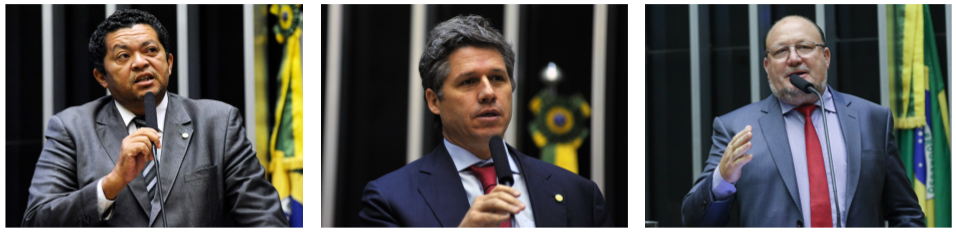

### **3 - Quais os tipos de gastos mais comuns registrados?**

In [ ]:
# Realiza a contagem de valores presentes no atributo descrição
tipoGastos = gastosCEAP.value_counts('descricao').sort_values(0).reset_index()
tipoGastos

,descricao,0
0,"PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR",1
1,LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,9
2,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14
3,ASSINATURA DE PUBLICAÇÕES,56
4,SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...,65
5,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",87
6,PASSAGENS AÉREAS,202
7,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",228
8,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",595
9,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,633


**R=** Como pode ser observado a célula acima, os tipos de gastos mais recorrente entre os parlamentares são com combustíveis e lubrificantes, serviço de táxi, pedágio e estacionamento, além de, manutenção de escritório de apoio à atividade parlamentar.

### **4 - Qual o tipo de gasto mais caro para os cofres públicos?**

In [ ]:
gastosCEAP.groupby('descricao')['valor_liquido'].sum().sort_values()

descricao
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR               1400.00
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                     9778.59
ASSINATURA DE PUBLICAÇÕES                                      19390.35
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                           40030.00
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                     55515.69
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                      82910.30
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.      100195.58
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        170638.80
LOCAÇÃO OU FRETAMENTO DE AERONAVES                            220150.00
PASSAGENS AÉREAS                                              227926.37
SERVIÇOS POSTAIS                                              346851.82
TELEFONIA                                                     390687.77
Emissão Bilhete Aéreo                                         905246.00
COMBUSTÍVEIS E LUBRIFICANTES.                         

**R=** Apesar dos gastos com combustíveis e lubrificantes serem os mais recorrentes entre os parlamentares, o tipo de gasto mais caro foram gastos com divulgação da atividade parlamentar como pode ser verificado na célula acima.

### **5 - Qual o parlamentar que mais revindicou a cota CEAP?**

In [ ]:
gastosCEAP.value_counts('parlamentar')

parlamentar
Delegado Antônio Furtado    187
Diego Garcia                171
Nereu Crispim               165
Subtenente Gonzaga          148
Vitor Hugo                  146
                           ... 
Dr. Sinval Malheiros          2
Kim Kataguiri                 2
Danilo Cabral                 2
Felipe Carreras               1
Adriana Ventura               1
Length: 516, dtype: int64

In [ ]:
# Realiza um filtro buscando informações referentes apenas ao parlamentar especificado
gastosCEAP.query("parlamentar == 'Delegado Antônio Furtado'").sort_values('valor_liquido', ascending=False)

,mes,parlamentar,partido,uf,descricao,cnpj/cpf_fornecedor,fornecedor,valor_documento,valor_glosa,valor_liquido
7584,2,Delegado Antônio Furtado,PSL,RJ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,05994990000144,MANOS GRAFICA LTDA - ME,17485.00,0.00,17485.00
12630,1,Delegado Antônio Furtado,PSL,RJ,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,08032833000146,MICHELSTEDTER E AZEVEDO LTDA,3700.00,0.00,3700.00
13859,1,Delegado Antônio Furtado,PSL,RJ,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,07319323000191,PANTANAL VEÍCULOS LTDA,2400.00,0.00,2400.00
13860,1,Delegado Antônio Furtado,PSL,RJ,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,07319323000191,PANTANAL VEÍCULOS LTDA,2400.00,0.00,2400.00
6483,2,Delegado Antônio Furtado,PSL,RJ,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,31180570000134,LUCAS PAULINO DE SOUSA NOGUEIRA,1300.00,252.50,1047.50
...,...,...,...,...,...,...,...,...,...,...
1957,2,Delegado Antônio Furtado,PSL,RJ,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19726048000100,CONCESSIONARIA BR-040 S.A.,5.30,0.00,5.30
1958,2,Delegado Antônio Furtado,PSL,RJ,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",19726048000100,CONCESSIONARIA BR-040 S.A.,5.30,0.00,5.30
8948,2,Delegado Antônio Furtado,PSL,RJ,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",17895646000187,UBER DO BRASIL TECNOLOGIA LTDA.,7.41,2.32,5.09
10131,2,Delegado Antônio Furtado,PSL,RJ,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",17895646000187,UBER DO BRASIL TECNOLOGIA LTDA.,5.90,0.86,5.04


**R=** O parlamentar que mais revindicou a cota CEAP foi o **Delegado Antônio Furtado** do **PSL**, tendo registrado 187 reembolsos. Apesar da grande quantidade de revindicações, os maiores gastos não foram desse parlamentar, como visto anteriormente.

<img src=https://www.camara.leg.br/internet/deputado/bandep/pagina_do_deputado/204451.jpg height=300>

### **6 - Qual a média de gastos por partidos?**

In [ ]:
# Realiza o agrupamento de dados por partidos e em seguida calcula a média de gastos de cada um deles
gastosCEAP.groupby('partido')['valor_liquido'].mean().sort_values()

partido
NOVO              277.805794
CIDADANIA         436.244915
PSL               588.083077
PSB               625.815085
AVANTE            648.966594
PT                705.285023
PATRIOTA          706.312434
PSD               710.536671
PP                778.501267
DEM               817.309604
PODE              829.027593
PV                871.070000
MDB               882.039685
PDT               893.825729
SOLIDARIEDADE     939.256324
PSDB              965.855143
PTB              1018.673655
PL               1030.140007
REPUBLICANOS     1048.775966
PROS             1163.045852
PCdoB            1186.696595
PSOL             1237.411429
PSC              1285.569641
REDE             1496.256364
Name: valor_liquido, dtype: float64

**R=** A lista de média de gastos por partido é exibido na célula acima, onde podemos observar que o partido **NOVO** teve a menor média de gastos e o partido **REDE**, a maior média dentre os demais.

### **7 - Qual a média de gastos por Unidade da Federação (UF)?**

In [ ]:
# Realiza o agrupamento por UF, em seguida calcula a media de gastos e realiza o ordenamento dos resultados
gastosByUF = gastosCEAP.groupby('uf')['valor_liquido'].mean().sort_values().reset_index()
gastosByUF

,uf,valor_liquido
0,RS,455.037128
1,MG,570.854016
2,SC,575.078928
3,PR,632.634984
4,SP,636.797221
5,RJ,662.651625
6,RN,729.342348
7,ES,733.335805
8,PE,783.251986
9,BA,804.597460


**R=** A lista de médias de gastos por UF é exibido na célula acima onde podemos observar que o estado do **Amapá** apresenta a maior média.

### **8 - Qual o parlamentar do estado do Pará que mais gastou com a cota CEAP?**

In [ ]:
# Realiza um filtro por parlamentares do Pará, em seguida o agrupamento desses 
# parlamentares, e por fim, o somatório e ordenação dos valores encontrados 
gastosPA = gastosCEAP.query('uf == "PA"').groupby('parlamentar')['valor_liquido'].sum().sort_values().reset_index()
gastosPA

,parlamentar,valor_liquido
0,José Priante,3045.63
1,Airton Faleiro,10436.19
2,Elcione Barbalho,12417.52
3,Vavá Martins,13313.17
4,Paulo Bengtson,14145.84
5,Júnior Ferrari,21166.93
6,Joaquim Passarinho,29145.78
7,Edmilson Rodrigues,32253.85
8,Eduardo Costa,35643.88
9,Nilson Pinto,39141.22


**R=** Dentre os 17 parlamentares do estado do Pará, novamente, **Beto Faro** do **PT**, aparece como o parlamentar que mais teve gastos com a cota CEAP tendo mais de R$ 90.000,00 reembolsados em 2020.

# **Visualização gráfica 📊**

Para melhor compreensão e visualização dos resultados obtidos na seção anterior, iremos realizar a plotagem de alguns gráficos.

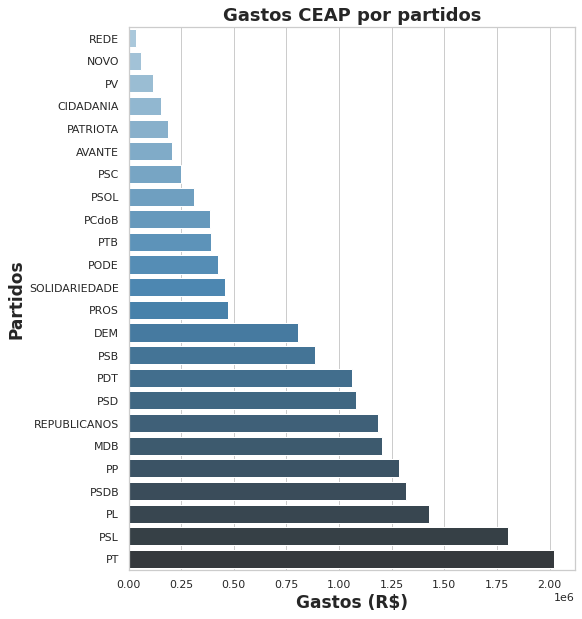

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1,1, figsize=(8,10))
sns.barplot(x='valor_liquido',y='partido', data=gastosByPartidos, orient='h', palette="Blues_d")
plt.title('Gastos CEAP por partidos', fontdict={'size':18, 'weight':'bold'})
plt.ylabel('Partidos', fontdict={'size':17, 'weight':'bold'})
plt.xlabel('Gastos (R$)', fontdict={'size':17, 'weight':'bold'})
plt.show()

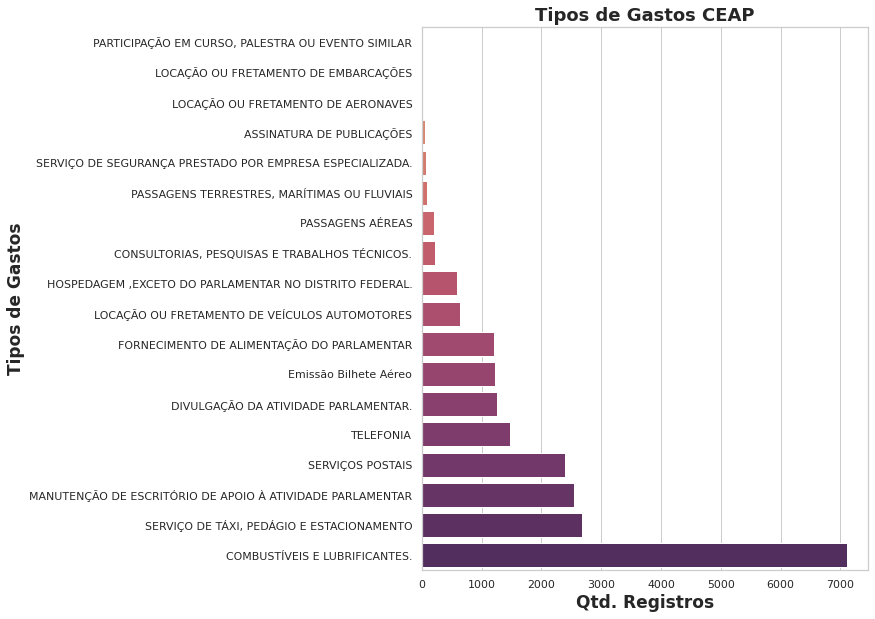

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,10))
sns.barplot(x=0, y='descricao', data=tipoGastos, orient='h', palette="flare")
plt.title('Tipos de Gastos CEAP', fontdict={'size':18, 'weight':'bold'})
plt.ylabel('Tipos de Gastos', fontdict={'size':17, 'weight':'bold'})
plt.xlabel('Qtd. Registros', fontdict={'size':17, 'weight':'bold'})
plt.show()

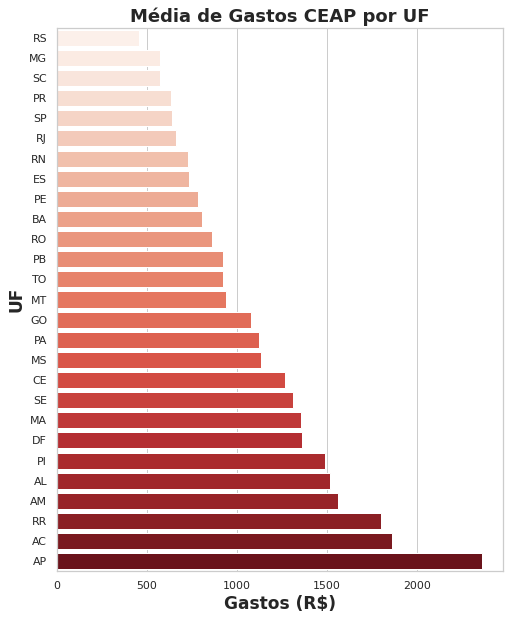

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,10))
sns.barplot(x='valor_liquido', y='uf', data=gastosByUF, orient='h', palette='Reds')
plt.title('Média de Gastos CEAP por UF', fontdict={'size':18, 'weight':'bold'})
plt.ylabel('UF', fontdict={'size':17, 'weight':'bold'})
plt.xlabel('Gastos (R$)', fontdict={'size':17, 'weight':'bold'})
plt.show()

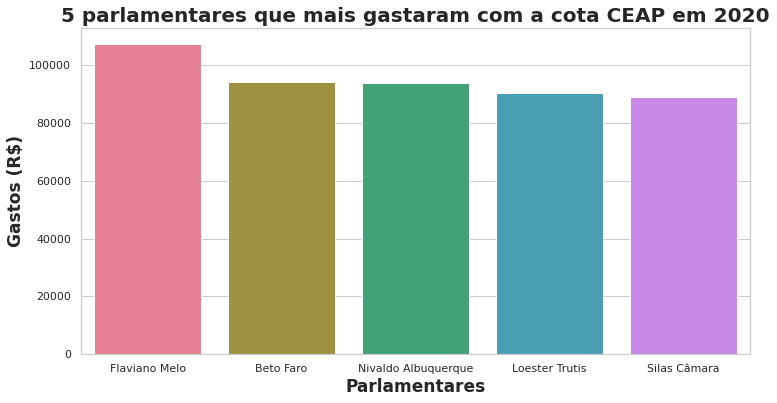

In [ ]:
rankParlamentar = gastosCEAP.groupby('parlamentar')['valor_liquido'].sum().sort_values(ascending=False)[:5].reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='parlamentar', y='valor_liquido', data=rankParlamentar, palette='husl')
ax.set_title('5 parlamentares que mais gastaram com a cota CEAP em 2020', fontdict={'size':20, 'weight':'bold'})
ax.set_xlabel('Parlamentares', fontdict={'size':17, 'weight':'bold'})
ax.set_ylabel('Gastos (R$)', fontdict={'size':17, 'weight':'bold'})
plt.show()